In [1]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [2]:
asxTicker = 'AX1.AX'

data = yf.download(
        tickers = asxTicker,
        period = "1y",
        interval="1wk")

[*********************100%***********************]  1 of 1 completed


In [89]:
dataFrame = pd.DataFrame({"Open":data['Open'], "Close": data['Close'], "Volume": data['Volume']})

dataFrame['Delta'] = dataFrame['Close'] - dataFrame['Open']

In [90]:
dataFrame['MA10'] = dataFrame['Close'].rolling(10).mean()

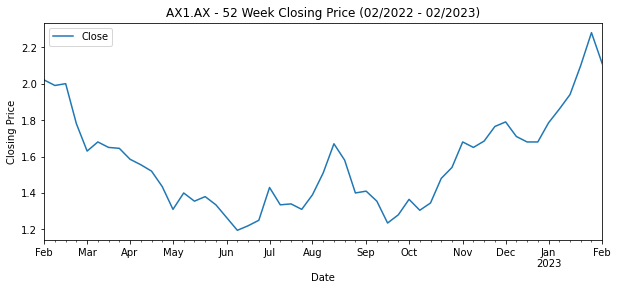

In [91]:
dataFrame = dataFrame.reset_index()

dataFrame.plot(x = 'Date', y = 'Close',
            title= asxTicker + ' - ' + '52 Week Closing Price (02/2022 - 02/2023)' ,
            ylabel="Closing Price",
            xlabel="Date",
            figsize=(10, 4))

print("")

In [61]:
def func(row):
    
    if row['Close'] > row['Open']:
        val = "Gain"
    elif row['Close'] < row['Open']:
        val = "Loss"
    else:
        val = "No Change"
    return val

dataFrame['Price Movement (Gain/Loss)'] = dataFrame.apply(func, axis=1)

In [82]:
x = dataFrame[["Close", "Volume"]].describe()

x ['Volume'] = x['Volume'].astype(int)

x['Close'] = x['Close'].round(2) 

x

,Close,Volume
count,53.00,53
mean,1.57,4876648
std,0.26,2184651
min,1.20,657255
25%,1.36,3114100
50%,1.54,4969225
75%,1.68,5795619
max,2.28,12165485
